# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
## 


In [82]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [83]:
# check the tensorflow version
print(tf.__version__)

2.1.0


In [84]:
# read training dataset
dataset_org = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_filtered2.csv')

# 1. M/L model for Area

In [85]:
# make an instance for dataset
dataset = dataset_org
# extract the columns from the dataset
column_names = dataset.columns

dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Pelvic
0,1240,602,1170,1050,957,743,611,657,806,744,...,1070,644,1160,796,1040,1190,933,560,-99.241919,71.908631
1,821,854,681,647,480,508,826,1220,689,1160,...,625,1170,1280,1170,694,991,480,1290,-99.231434,73.710779
2,529,878,926,1090,975,793,1160,1110,594,1290,...,988,811,1250,1190,1190,850,765,1010,-92.678782,73.622222
3,794,1050,843,1030,555,1240,549,814,960,968,...,876,898,1170,612,472,495,1300,532,-92.024720,76.122176
4,696,855,605,541,1290,469,1180,1190,1110,570,...,547,843,595,1090,776,1300,784,788,-90.755384,76.526978


In [86]:
# remove Pelvic culumn from the dataset
dataset.pop("Pelvic")
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area
0,1240,602,1170,1050,957,743,611,657,806,744,...,665,1070,644,1160,796,1040,1190,933,560,-99.241919
1,821,854,681,647,480,508,826,1220,689,1160,...,812,625,1170,1280,1170,694,991,480,1290,-99.231434
2,529,878,926,1090,975,793,1160,1110,594,1290,...,1160,988,811,1250,1190,1190,850,765,1010,-92.678782
3,794,1050,843,1030,555,1240,549,814,960,968,...,907,876,898,1170,612,472,495,1300,532,-92.024720
4,696,855,605,541,1290,469,1180,1190,1110,570,...,644,547,843,595,1090,776,1300,784,788,-90.755384


In [87]:
# Training & test dataset
train_dataset = dataset.sample(frac=0.7)
test_dataset = dataset.drop(train_dataset.index)	

train_dataset.head()


,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area
2049,590,560,663,1160,1270,1280,999,1140,1170,1150,...,516,976,1230,679,878,942,983,600,1300,1731.554997
999,1260,1240,610,651,1160,1110,774,767,621,764,...,977,1030,1210,536,1270,969,601,943,735,800.527807
25,979,551,567,1290,753,1220,899,996,820,537,...,1130,695,1030,673,1010,667,773,1140,747,-47.922172
1909,516,1130,1240,907,853,536,964,789,1050,1100,...,629,1140,1050,528,1050,1290,834,816,576,1572.669056
1401,1120,983,551,1280,499,1030,1240,1240,560,940,...,631,1250,1280,769,1250,795,820,901,844,1092.605928


In [88]:
# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop("Area")

train_stats = train_stats.transpose()
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
L11_FLG,1662.0,896.801444,257.457481,469.0,663.50,897.0,1130.0,1320.0
L11_WALL,1662.0,883.275572,259.205708,468.0,647.00,871.5,1120.0,1320.0
L12_CNR,1662.0,889.259928,258.480781,468.0,656.25,885.5,1120.0,1320.0
L12_FLG,1662.0,891.873646,260.380666,468.0,658.25,889.0,1130.0,1320.0
L12_WALL,1662.0,885.360409,261.762395,468.0,653.25,871.0,1120.0,1320.0


In [89]:
# make instances for dataset without the QoI
train_labels = train_dataset.pop('Area')
test_labels = test_dataset.pop('Area')

In [90]:
# normalization of each dataset instance

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)

normed_train_data.tail()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L09_WALL,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL
1286,1.596441,-0.339444,1.297216,0.613766,-1.522506,0.782756,1.045037,-1.567285,0.268166,1.618383,...,0.314861,-0.672997,-0.577019,1.602624,-0.400762,0.039613,0.222697,-0.089987,0.188671,-0.731046
1659,1.010779,-0.830892,1.562717,-1.396828,0.204529,0.975591,-0.578855,1.203751,0.159995,-0.070328,...,-0.313548,-0.102588,-0.292121,0.714544,1.413606,-1.459664,1.607698,-1.382153,-1.163196,0.101770
786,0.620337,-1.121117,0.955858,-0.430196,-0.618238,-0.135135,-0.330542,-0.650057,-1.022160,-0.988955,...,0.526901,-0.218212,-1.212265,1.216502,0.987152,-0.127405,-1.208598,0.045420,1.260179,1.507625
473,-0.047318,0.302922,-1.016434,1.271075,0.115266,-0.810055,0.493229,-1.544064,-0.272689,-1.243044,...,-1.215681,0.941875,-0.746418,0.320700,-0.102244,-1.145049,1.646277,0.091845,0.100339,-0.708125
804,-0.246443,1.572174,-0.902648,1.580397,0.887581,1.091291,0.729718,1.435961,-0.091116,0.359668,...,1.105191,0.672088,-1.062116,0.374757,-1.373853,0.125064,1.067586,0.892678,-0.034080,0.781776


In [91]:
# M/L model building
# Regularizer는 최적화 과정 중에 각 층별 파라미터 또는 출력값에 대하여 페널티를 적용할 수 있게 해줍니다. 이러한 페널티는 네트워크가 최적화 하려는 손실 함수의 일부로 포함됩니다.
# Dense = 56(input) X 1(output) = 56

def build_model():
    model = keras.Sequential([
      layers.Dense(56, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(56, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      layers.Dense(1)
      ])
    #optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss='mae',
      optimizer=optimizer,
      # 'mae', 'mse', 'mape',
      metrics=['mae'])

    return model

In [92]:
# create the model instance 
model_Area = build_model()
model_Area.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_13 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 57        
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Check the M/L model with small cases
# example_batch  = normed_train_data[:10]
example_batch  = normed_train_data[:5]
example_result = model_Area.predict(example_batch)
example_result

array([[ 0.7342737 ],
       [-1.414551  ],
       [-0.8014616 ],
       [ 0.39417648],
       [-0.5735348 ]], dtype=float32)

In [94]:
# Start training

# model.fit(data, labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))
# tf.keras.Model.fit에는 세 개의 중요한 매개변수가 있습니다:
# epochs: 훈련은 에포크(epoch)로 구성됩니다. 한 에포크는 전체 입력 데이터를 한번 순회하는 것입니다(작은 배치로 나누어 수행됩니다).
# batch_size: 넘파이 데이터를 전달하면 모델은 데이터를 작은 배치로 나누고 훈련 과정에서 이 배치를 순회합니다. 이 정수 값은 배치의 크기를 지정합니다. 전체 샘플 개수가 배치 크기로 나누어 떨어지지 않으면 마지막 배치의 크기는 더 작을 수 있습니다.
# validation_data: 모델의 프로토타입(prototype)을 만들 때는 검증 데이터(validation data)에서 간편하게 성능을 모니터링해야 합니다. 입력과 레이블(label)의 튜플을 이 매개변수로 전달하면 에포크가 끝날 때마다 추론 모드(inference mode)에서 전달된 데이터의 손실과 측정 지표를 출력합니다.

EPOCHS = 1000

history = model_Area.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )


Epoch: 0, loss:994.8379,  mae:994.2403,  val_loss:1053.4076,  val_mae:1052.7985,  
....................................................................................................
Epoch: 100, loss:203.2576,  mae:198.5405,  val_loss:337.2054,  val_mae:332.4799,  
....................................................................................................
Epoch: 200, loss:82.7957,  mae:76.7903,  val_loss:277.9805,  val_mae:271.9708,  
....................................................................................................
Epoch: 300, loss:42.8387,  mae:36.1606,  val_loss:276.3027,  val_mae:269.6231,  
....................................................................................................
Epoch: 400, loss:29.3249,  mae:22.2935,  val_loss:275.6264,  val_mae:268.5926,  
....................................................................................................
Epoch: 500, loss:23.4260,  mae:16.2106,  val_loss:280.4053,  val_mae:273.1910,  
....

In [95]:
test_mae_score, test_mae_score = model_Area.evaluate(  normed_test_data, test_labels  )
test_mae_score

713/713 [==============================] - 0s 21us/sample - loss: 340.2687 - mae: 333.0778


333.07776

Text(0, 0.5, 'MAE [Area]')

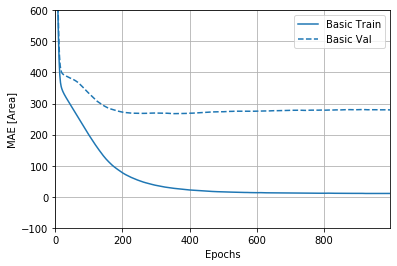

In [96]:
# 일반화, 과대적합, 과소적합 확인 
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([-100, 600])
plt.ylabel('MAE [Area]')

In [97]:
# early stop by val_mae

early_stop = keras.callbacks.EarlyStopping(monitor='mae', patience=10)

early_history = model_Area.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:17.6242,  mae:10.4335,  val_loss:287.6365,  val_mae:280.4461,  
.............

In [98]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([-100, 600])
plt.ylabel('MAE [Area]')

ValueError: x and y must have same first dimension, but have shapes (13,) and (17,)

In [99]:
# model evaluate 
loss, mae = model_Area.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Area {:5.2f} [mm2]".format(mae))

713/713 - 0s - loss: 339.4318 - mae: 332.2430
Testing set Mean Abs Error: Area 332.24 [mm2]


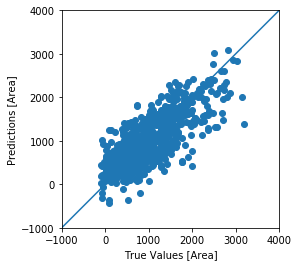

In [100]:
# model evaluate by curve
test_predictions = model_Area.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Area]')
plt.ylabel('Predictions [Area]')
lims = [-1000, 4000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# 2. M/L model for Pelvic displacement


In [101]:
# read training dataset
dataset_org = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\New_Testing_parameters_high_filtered2.csv')
# make an instance for dataset
dataset = dataset_org
# extract the columns from the dataset
column_names = dataset.columns
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Area,Pelvic
0,1240,602,1170,1050,957,743,611,657,806,744,...,1070,644,1160,796,1040,1190,933,560,-99.241919,71.908631
1,821,854,681,647,480,508,826,1220,689,1160,...,625,1170,1280,1170,694,991,480,1290,-99.231434,73.710779
2,529,878,926,1090,975,793,1160,1110,594,1290,...,988,811,1250,1190,1190,850,765,1010,-92.678782,73.622222
3,794,1050,843,1030,555,1240,549,814,960,968,...,876,898,1170,612,472,495,1300,532,-92.024720,76.122176
4,696,855,605,541,1290,469,1180,1190,1110,570,...,547,843,595,1090,776,1300,784,788,-90.755384,76.526978


In [102]:
# remove Pelvic culumn from the dataset
dataset.pop("Area")
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Pelvic
0,1240,602,1170,1050,957,743,611,657,806,744,...,665,1070,644,1160,796,1040,1190,933,560,71.908631
1,821,854,681,647,480,508,826,1220,689,1160,...,812,625,1170,1280,1170,694,991,480,1290,73.710779
2,529,878,926,1090,975,793,1160,1110,594,1290,...,1160,988,811,1250,1190,1190,850,765,1010,73.622222
3,794,1050,843,1030,555,1240,549,814,960,968,...,907,876,898,1170,612,472,495,1300,532,76.122176
4,696,855,605,541,1290,469,1180,1190,1110,570,...,644,547,843,595,1090,776,1300,784,788,76.526978


In [103]:
# make training & test dataset
# for training, 70% is used for training.
# sampling is by random
train_dataset = dataset.sample(frac=0.5)

# DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
test_dataset = dataset.drop(train_dataset.index)	
# test_dataset = dataset

train_dataset.head()


,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,Pelvic
137,610,756,1310,540,832,990,826,497,578,829,...,653,1270,1020,754,1140,601,604,587,677,76.199658
942,865,1180,916,489,1250,1200,884,636,919,841,...,988,1310,750,1170,825,711,637,1020,746,75.004942
1414,1250,545,1280,585,707,562,757,795,1320,914,...,932,985,643,858,1070,1230,946,673,624,75.796749
1759,498,742,1040,1080,1070,695,1230,523,943,1260,...,948,532,991,659,1280,835,1160,916,770,79.891214
1638,681,546,492,1230,847,1310,953,1280,692,1210,...,904,1280,904,877,927,715,1200,973,774,75.338618


In [104]:
# data 산포 분석

# fig = sns.pairplot(train_dataset[["HLAYER01", "HLAYER02", "HLAYER03","HLAYER04","HLAYER05","Area"]], diag_kind="kde")	
# fig.savefig('foo.png')

In [105]:
# summarize the training data status

# DataFrame.describe(self: ~ FrameOrSeries, percentiles=None, include=None, exclude=None) 
# make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
# delete "Area" column from "train_stats"
train_stats.pop("Pelvic")

train_stats = train_stats.transpose()
train_stats.tail()

,count,mean,std,min,25%,50%,75%,max
L11_FLG,1188.0,903.132997,253.652614,469.0,682.75,909.5,1130.0,1320.0
L11_WALL,1188.0,893.317340,256.941425,468.0,658.75,893.0,1130.0,1320.0
L12_CNR,1188.0,894.083333,260.052782,468.0,659.50,887.0,1140.0,1320.0
L12_FLG,1188.0,895.540404,261.785180,468.0,654.00,893.5,1140.0,1320.0
L12_WALL,1188.0,886.952020,262.097855,468.0,655.00,875.5,1130.0,1320.0


In [106]:
# make instances for dataset without the QoI
train_labels = train_dataset.pop('Pelvic')
test_labels = test_dataset.pop('Pelvic')

In [107]:
# # normalization of each dataset instance
# # Question???
# # Although all parameters are material stiffness, normalization have to proceed? 
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)

# normed_train_data.tail()

In [108]:
# create the model instance 
model_Pelvic = build_model()
model_Pelvic.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_16 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 57        
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Check the M/L model with small cases
# example_batch  = normed_train_data[:10]
example_batch  = normed_train_data[:5]
example_result = model_Pelvic.predict(example_batch)
example_result

array([[ 0.31293046],
       [-1.119612  ],
       [-0.45822704],
       [ 0.60583717],
       [-1.1965675 ]], dtype=float32)

In [110]:
EPOCHS = 10000

history = model_Pelvic.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )


Epoch: 0, loss:74.3505,  mae:73.7461,  val_loss:71.4619,  val_mae:70.8478,  
....................................................................................................
Epoch: 100, loss:1.3923,  mae:0.5376,  val_loss:5.0513,  val_mae:4.1978,  
....................................................................................................
Epoch: 200, loss:1.1325,  mae:0.4718,  val_loss:4.4864,  val_mae:3.8268,  
....................................................................................................
Epoch: 300, loss:1.0065,  mae:0.4715,  val_loss:3.9743,  val_mae:3.4399,  
....................................................................................................
Epoch: 400, loss:0.9941,  mae:0.5490,  val_loss:3.6090,  val_mae:3.1646,  
....................................................................................................
Epoch: 500, loss:0.8862,  mae:0.5076,  val_loss:3.1538,  val_mae:2.7755,  
..........................................

In [111]:
test_mae_score, test_mae_score = model_Pelvic.evaluate(  normed_test_data, test_labels  )
test_mae_score

1187/1187 [==============================] - 0s 27us/sample - loss: 0.4850 - mae: 0.4518


0.45182475

In [112]:
dataset_deb = pd.read_csv(r'F:\CON_2019_HMC_PGD-MINESET\Second_model\Case2\whe_ro_to_send\org_Testing_parameters.csv')

column_names = dataset_deb.columns
dataset_deb.head()
dataset_deb.pop("Area")
dataset_deb.head()

deb_labels = dataset_deb.pop('Pelvic')

normed_dataset_deb = norm(dataset_deb)

In [113]:
example_batch  = normed_dataset_deb[:5]
# for val in normed_deb_test_data[:]:
print(dataset_deb[:5])

HLAYER01  HLAYER02  HLAYER03  HLAYER04  HLAYER05  HLAYER06  HLAYER07  \
0      1470      1470      1470      1470      1470      1470      1470   
1      1180      1180       590       780      1180       980      1180   
2      1470       980      1180       780      1180      1180       590   
3      1470       980       780      1180       590      1470       590   
4       780      1470      1470      1470       780      1180      1470   

   HLAYER08  HLAYER09  HLAYER10  ...  L09_WALL  L10_CNR  L10_FLG  L10_WALL  \
0      1470      1470      1470  ...      1470     1470     1470      1470   
1       980      1180       780  ...       780     1470      980      1470   
2       780       980      1180  ...       980      590     1470       780   
3      1180       780      1180  ...       780     1180      780       780   
4       780      1180      1470  ...       780      780      780       980   

   L11_CNR  L11_FLG  L11_WALL  L12_CNR  L12_FLG  L12_WALL  
0     1470     1470    

In [114]:
example_result = model_Pelvic.predict(example_batch)
example_result

array([[89.722885],
       [81.03953 ],
       [77.2874  ],
       [74.27468 ],
       [75.53727 ]], dtype=float32)

Text(0, 0.5, 'MAE [Pelvic displacement]')

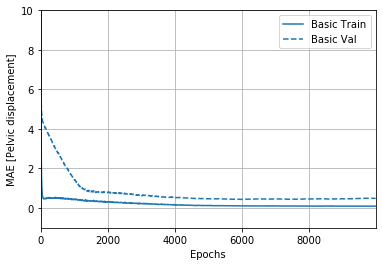

In [115]:
# 일반화, 과대적합, 과소적합 확인 
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([-1, 10])
plt.ylabel('MAE [Pelvic displacement]')

In [116]:
# early stop by val_mae

early_stop_pelvic = keras.callbacks.EarlyStopping(monitor='mae', patience=10)

early_history_pelvic = model_Pelvic.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.1286,  mae:0.0955,  val_loss:0.5353,  val_mae:0.5022,  
..................

Text(0, 0.5, 'MAE [Pelvic displacement]')

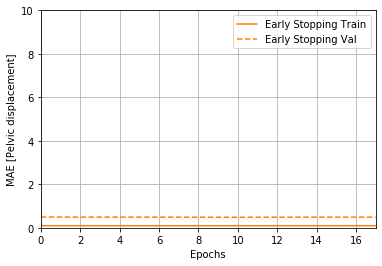

In [117]:
plotter.plot({'Early Stopping': early_history_pelvic}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Pelvic displacement]')

In [118]:
# model evaluate 
loss, mae = model_Pelvic.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: Pelvic disp {:5.2f} [mm]".format(mae))

1187/1187 - 0s - loss: 0.4886 - mae: 0.4555
Testing set Mean Abs Error: Pelvic disp  0.46 [mm]


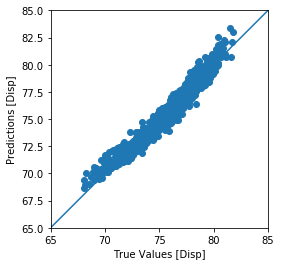

In [119]:
# model evaluate by curve
test_predictions = model_Pelvic.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Disp]')
plt.ylabel('Predictions [Disp]')
lims = [65, 85]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# 3. Optimization by Generic Algorithm

In [120]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [121]:
# Number of Curve points
point = 2375
# Number of variables 
var = 56

In [122]:
# predict_func
# Mean square error between test and prediction

def predict_func(column_names):

    min_Area   = -100
    max_Area   = 3200
    min_Pelvic = 67
    max_Pelvic = 82

    for i in range( 0, len(column_names) ):
        if column_names[i] <= 515 :
            column_names[i] = 440
        elif 515 < column_names[i] <= 685:
            column_names[i] = 590
        elif 685 < column_names[i] <= 880:
            column_names[i] = 780
        elif 880 < column_names[i] <= 1080:
            column_names[i] = 980
        elif 1080 < column_names[i] <= 1290:
            column_names[i] = 1180
        elif 1290 < column_names[i] :
            column_names[i] = 1400
        

    PARTNO01 = column_names[0]
    PARTNO02 = column_names[1]
    PARTNO03 = column_names[2]
    PARTNO04 = column_names[3]
    PARTNO05 = column_names[4]
    PARTNO06 = column_names[5]
    PARTNO07 = column_names[6]
    PARTNO08 = column_names[7]
    PARTNO09 = column_names[8]
    PARTNO10 = column_names[9]

    PARTNO11 = column_names[10]
    PARTNO12 = column_names[11]
    PARTNO13 = column_names[12]
    PARTNO14 = column_names[13]
    PARTNO15 = column_names[14]
    PARTNO16 = column_names[15]
    PARTNO17 = column_names[16]
    PARTNO18 = column_names[17]
    PARTNO19 = column_names[18]
    PARTNO20 = column_names[19]

    PARTNO21 = column_names[20]
    PARTNO22 = column_names[21]
    PARTNO23 = column_names[22]
    PARTNO24 = column_names[23]
    PARTNO25 = column_names[24]
    PARTNO26 = column_names[25]
    PARTNO27 = column_names[26]
    PARTNO28 = column_names[27]
    PARTNO29 = column_names[28]
    PARTNO30 = column_names[29]

    PARTNO31 = column_names[30]
    PARTNO32 = column_names[31]
    PARTNO33 = column_names[32]
    PARTNO34 = column_names[33]
    PARTNO35 = column_names[34]
    PARTNO36 = column_names[35]
    PARTNO37 = column_names[36]
    PARTNO38 = column_names[37]
    PARTNO39 = column_names[38]
    PARTNO40 = column_names[39]

    PARTNO41 = column_names[40]
    PARTNO42 = column_names[41]
    PARTNO43 = column_names[42]
    PARTNO44 = column_names[43]
    PARTNO45 = column_names[44]

    PARTNO46 = column_names[45]
    PARTNO47 = column_names[46]
    PARTNO48 = column_names[47]
    PARTNO49 = column_names[48]
    PARTNO50 = column_names[49]

    PARTNO51 = column_names[50]
    PARTNO52 = column_names[51]
    PARTNO53 = column_names[52]
    PARTNO54 = column_names[53]
    PARTNO55 = column_names[54]
    PARTNO56 = column_names[55]

    # Prediction data standardize
    # Common variables
    PARTNO01N = norm(PARTNO01)
    PARTNO02N = norm(PARTNO02)
    PARTNO03N = norm(PARTNO03)
    PARTNO04N = norm(PARTNO04) 
    PARTNO05N = norm(PARTNO05)
    PARTNO06N = norm(PARTNO06)
    PARTNO07N = norm(PARTNO07)
    PARTNO08N = norm(PARTNO08)
    PARTNO09N = norm(PARTNO09) 
    PARTNO10N = norm(PARTNO10)

    PARTNO11N = norm(PARTNO11)
    PARTNO12N = norm(PARTNO12)
    PARTNO13N = norm(PARTNO13)
    PARTNO14N = norm(PARTNO14) 
    PARTNO15N = norm(PARTNO15)
    PARTNO16N = norm(PARTNO16)
    PARTNO17N = norm(PARTNO17)
    PARTNO18N = norm(PARTNO18)
    PARTNO19N = norm(PARTNO19) 
    PARTNO20N = norm(PARTNO20)

    PARTNO21N = norm(PARTNO21)
    PARTNO22N = norm(PARTNO22)
    PARTNO23N = norm(PARTNO23)
    PARTNO24N = norm(PARTNO24) 
    PARTNO25N = norm(PARTNO25)
    PARTNO26N = norm(PARTNO26)
    PARTNO27N = norm(PARTNO27)
    PARTNO28N = norm(PARTNO28)
    PARTNO29N = norm(PARTNO29) 
    PARTNO30N = norm(PARTNO30)

    PARTNO31N = norm(PARTNO31)
    PARTNO32N = norm(PARTNO32)
    PARTNO33N = norm(PARTNO33)
    PARTNO34N = norm(PARTNO34) 
    PARTNO35N = norm(PARTNO35)
    PARTNO36N = norm(PARTNO36)
    PARTNO37N = norm(PARTNO37)
    PARTNO38N = norm(PARTNO38)
    PARTNO39N = norm(PARTNO39) 
    PARTNO40N = norm(PARTNO40)

    PARTNO41N = norm(PARTNO41)
    PARTNO42N = norm(PARTNO42)
    PARTNO43N = norm(PARTNO43)
    PARTNO44N = norm(PARTNO44) 
    PARTNO45N = norm(PARTNO45)
    PARTNO46N = norm(PARTNO46)

    PARTNO47N = norm(PARTNO47)
    PARTNO48N = norm(PARTNO48)
    PARTNO49N = norm(PARTNO49)
    PARTNO50N = norm(PARTNO50) 
    PARTNO51N = norm(PARTNO51)
    PARTNO52N = norm(PARTNO52)
    PARTNO53N = norm(PARTNO53)
    PARTNO54N = norm(PARTNO54)
    PARTNO55N = norm(PARTNO55) 
    PARTNO56N = norm(PARTNO56)    

    # Result of prediction data   
    predict_cur_Area = model_Area.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]
    predict_cur_Pelvic = model_Pelvic.predict([[
        PARTNO01N,        PARTNO02N,        PARTNO03N,        PARTNO04N,        PARTNO05N, \
        PARTNO06N,        PARTNO07N,        PARTNO08N,        PARTNO09N,        PARTNO10N, \
        PARTNO11N,        PARTNO12N,        PARTNO13N,        PARTNO14N,        PARTNO15N, \
        PARTNO16N,        PARTNO17N,        PARTNO18N,        PARTNO19N,        PARTNO20N, \
        PARTNO21N,        PARTNO22N,        PARTNO23N,        PARTNO24N,        PARTNO25N, \
        PARTNO26N,        PARTNO27N,        PARTNO28N,        PARTNO29N,        PARTNO30N, \
        PARTNO31N,        PARTNO32N,        PARTNO33N,        PARTNO34N,        PARTNO35N, \
        PARTNO36N,        PARTNO37N,        PARTNO38N,        PARTNO39N,        PARTNO40N, \
        PARTNO41N,        PARTNO42N,        PARTNO43N,        PARTNO44N,        PARTNO45N, \
        PARTNO46N,        PARTNO47N,        PARTNO48N,        PARTNO49N,        PARTNO50N, \
        PARTNO51N,        PARTNO52N,        PARTNO53N,        PARTNO54N,        PARTNO55N, \
        PARTNO56N
        ]])[0]        
 

    norm_Area   = (predict_cur_Area   - min_Area  )/(max_Area   - min_Area  )
    norm_Pelvic = (predict_cur_Pelvic - min_Pelvic)/(max_Pelvic - min_Pelvic)
    print(predict_cur_Area, predict_cur_Pelvic)

    weight1 = 0.9
    weight2 = 0.1

    return   weight1 * norm_Area + weight2 * norm_Pelvic 


In [123]:
# bnds; doundary conditions
# Parameter of Boundary conditions
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),                       
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ),
        ( 440, 1400 )
]
print(len(bnds))

56


In [124]:
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')



84]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-353.85248] [75.35644]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.4001] [72.38884]
[-363.

In [125]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 796.52009274,  896.32349546, 1022.97951898, 1196.62857068,
         440.43058073,  731.75585578, 1332.23424795, 1109.95140812,
        1161.91306151,  443.02178644,  613.33992629,  802.04193697,
         762.23382509,  531.38074405, 1255.26467567,  744.61152708,
        1044.38765104, 1113.17824635, 1217.23703898, 1101.26849829,
         930.72308229, 1071.48045611, 1226.49209739,  765.76038711,
        1123.61579197, 1095.36292725,  594.18585081, 1079.03339109,
        1097.01777455, 1271.4608565 , 1009.87805221,  882.05838215,
        1219.16284379,  530.79863891, 1191.9767265 ,  577.70554194,
         829.67912142, 1152.25214296,  729.75059802,  954.45893914,
        1152.42129444, 1017.30389685, 1316.1885565 , 1327.47279832,
         599.38775955,  661.1884911 , 1257.12158704,  900.62683947,
         753.58576787,  805.19991345,  947.62990045,  698.94524225,
        1355.34511432,  818.56932   ,  662.53328516, 1131.04282887]),
 -0.03591078519821167)

In [126]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 :
        minimum_best1bin_x[i] = 440
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 590
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 780
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 980
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 1180
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 1400
minimum_best1bin_x        

array([ 780.,  980.,  980., 1180.,  440.,  780., 1400., 1180., 1180.,
        440.,  590.,  780.,  780.,  590., 1180.,  780.,  980., 1180.,
       1180., 1180.,  980.,  980., 1180.,  780., 1180., 1180.,  590.,
        980., 1180., 1180.,  980.,  980., 1180.,  590., 1180.,  590.,
        780., 1180.,  780.,  980., 1180.,  980., 1400., 1400.,  590.,
        590., 1180.,  980.,  780.,  780.,  980.,  780., 1400.,  780.,
        590., 1180.])

In [127]:
for i in range( 0, len(minimum_best1bin_x) ):
    if minimum_best1bin_x[i] <= 515 : 
        minimum_best1bin_x[i] = 11380000
    elif 515 < minimum_best1bin_x[i] <= 685:
        minimum_best1bin_x[i] = 11130000
    elif 685 < minimum_best1bin_x[i] <= 880:
        minimum_best1bin_x[i] = 11160000
    elif 880 < minimum_best1bin_x[i] <= 1080:
        minimum_best1bin_x[i] = 11190000
    elif 1080 < minimum_best1bin_x[i] <= 1290:
        minimum_best1bin_x[i] = 11210000
    elif 1290 < minimum_best1bin_x[i] :
        minimum_best1bin_x[i] = 60101030
minimum_best1bin_x        

array([11160000., 11190000., 11190000., 11210000., 11380000., 11160000.,
       60101030., 11210000., 11210000., 11380000., 11130000., 11160000.,
       11160000., 11130000., 11210000., 11160000., 11190000., 11210000.,
       11210000., 11210000., 11190000., 11190000., 11210000., 11160000.,
       11210000., 11210000., 11130000., 11190000., 11210000., 11210000.,
       11190000., 11190000., 11210000., 11130000., 11210000., 11130000.,
       11160000., 11210000., 11160000., 11190000., 11210000., 11190000.,
       60101030., 60101030., 11130000., 11130000., 11210000., 11190000.,
       11160000., 11160000., 11190000., 11160000., 60101030., 11160000.,
       11130000., 11210000.])

In [128]:
for val in minimum_best1bin_x:
    print(val)


11160000.0
11190000.0
11190000.0
11210000.0
11380000.0
11160000.0
60101030.0
11210000.0
11210000.0
11380000.0
11130000.0
11160000.0
11160000.0
11130000.0
11210000.0
11160000.0
11190000.0
11210000.0
11210000.0
11210000.0
11190000.0
11190000.0
11210000.0
11160000.0
11210000.0
11210000.0
11130000.0
11190000.0
11210000.0
11210000.0
11190000.0
11190000.0
11210000.0
11130000.0
11210000.0
11130000.0
11160000.0
11210000.0
11160000.0
11190000.0
11210000.0
11190000.0
60101030.0
60101030.0
11130000.0
11130000.0
11210000.0
11190000.0
11160000.0
11160000.0
11190000.0
11160000.0
60101030.0
11160000.0
11130000.0
11210000.0
